In [1026]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

In [1027]:
rodada_jogada = 27  # Ultima rodada jogada: 27
rodada_prox = 28    # Rodada da proxima semana: 28

rodada_futura = pd.read_excel(f'dados/rodadas/rodada-{rodada_prox}.xlsx')
todas_rodadas = pd.read_excel('dados/rodadas/todas_rodadas.xlsx')
tabela = pd.read_excel(f'dados/tabela/tabela-rodada_{rodada_jogada}.xlsx')
historico = pd.read_excel(f'dados/historico/historico-rodada_{rodada_jogada}.xlsx')
historico.drop(['Time', 'Comp', 'Day', 'Result'], axis= 1, inplace= True)


In [1028]:
historico['Venue'] = historico['Venue'].map({'Home': 1, 'Away': 0})

In [1029]:
historico.head()

,Date,Round,Venue,GF,GA,Opponent,xG,xGA,Poss,Attendance,...,Blocks,SCA,GCA,TklW,Def 3rd,Mid 3rd,Att 3rd,Int,Err,Equipe
0,2023-04-15,1,1,2,1,Sao Paulo,0.9,2.0,33,11708.0,...,9,19,3,6,4,4,1,17,0,Botafogo (RJ)
1,2023-04-24,2,0,2,1,Bahia,0.2,0.9,42,27822.0,...,5,10,4,11,8,16,0,15,0,Botafogo (RJ)
2,2023-04-30,3,0,3,2,Flamengo,1.9,3.1,26,53138.0,...,6,21,6,12,11,6,1,11,0,Botafogo (RJ)
3,2023-05-07,4,1,2,0,Atletico Mineiro,2.0,0.5,39,18218.0,...,6,38,3,14,10,12,0,13,1,Botafogo (RJ)
4,2023-05-11,5,1,3,0,Corinthians,2.6,0.6,53,22388.0,...,8,27,5,5,4,5,1,11,0,Botafogo (RJ)


In [1030]:
historico.columns

Index(['Date', 'Round', 'Venue', 'GF', 'GA', 'Opponent', 'xG', 'xGA', 'Poss',
       'Attendance', 'Sh', 'SoT', 'SoT%', 'G/Sh', 'G/SoT', 'FK', 'PK', 'PKatt',
       'npxG', 'npxG/Sh', 'G-xG', 'np:G-xG', 'SoTA', 'Saves', 'Save%', 'CS',
       'PSxG', 'PSxG+/-', 'TotDist', 'PrgDist', 'Ast', 'xAG', 'xA', 'KP',
       '1/3', 'PPA', 'CrsPA', 'PrgP', 'TB', 'Sw', 'Crs', 'Blocks', 'SCA',
       'GCA', 'TklW', 'Def 3rd', 'Mid 3rd', 'Att 3rd', 'Int', 'Err', 'Equipe'],
      dtype='object')

In [1031]:
tabela.columns

Index(['Unnamed: 0', 'Rk', 'Squad', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD',
       'Pts', 'Pts/MP', 'xG', 'xGA', 'xGD', 'xGD/90', 'Last 5', 'xGConv',
       'xGAConv', 'GF/MP', 'GA/MP', 'expG', 'xG_casa', 'xG_fora', 'xG_total',
       'GF_casa', 'GF_fora', 'GF_total', 'GA_casa', 'GA_fora', 'GA_total',
       'xG_sofrido_casa', 'xG_sofrido_fora', 'xG_5casa', 'xG_5fora',
       'xG_5total', 'GF_5casa', 'GF_5fora', 'GF_5total', 'GA_5casa',
       'GA_5fora', 'GA_5total', 'xG_5sofrido_casa', 'xG_5sofrido_fora',
       'Sh_casa', 'SoT_casa', 'Saves_casa', 'GCA_casa', 'Tklw_casa', 'Sh_fora',
       'SoT_fora', 'Saves_fora', 'GCA_fora', 'Tklw_fora'],
      dtype='object')

In [1032]:
historico.drop(376, inplace= True)
historico.drop(191, inplace= True)

In [1033]:
modelo = smf.glm(formula= 'GF ~ C(Equipe)*C(Venue) + xG + C(Opponent)', data= historico, family= sm.families.Poisson()).fit()

In [1034]:
print(modelo.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                     GF   No. Observations:                  538
Model:                            GLM   Df Residuals:                      477
Model Family:                 Poisson   Df Model:                           60
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -655.34
Date:                Tue, 24 Oct 2023   Deviance:                       411.74
Time:                        15:27:49   Pearson chi2:                     335.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3364
Covariance Type:            nonrobust                                         
                                                  coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

# Analise de Residuo

In [1035]:
residuos = modelo.resid_response
residuos_media = residuos.mean()
residuos_padrao = modelo.resid_pearson
fitted = modelo.fittedvalues
observados = historico['GF']

<Axes: xlabel='GF'>

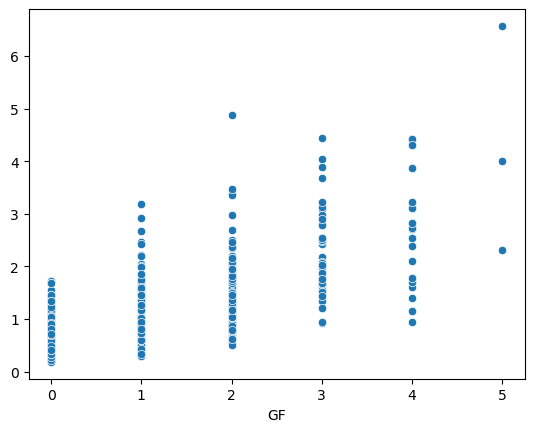

In [1036]:
sns.scatterplot(x= observados, y= fitted)

<Axes: >

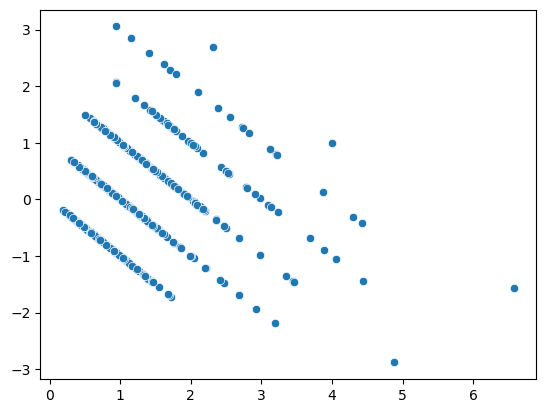

In [1037]:
sns.scatterplot(x= fitted, y = residuos)

<Axes: >

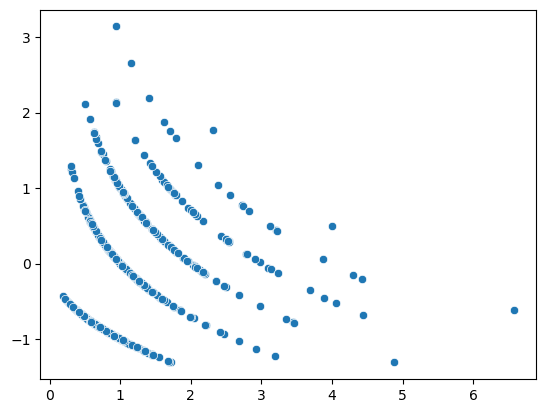

In [1038]:
sns.scatterplot(x= fitted, y= residuos_padrao)

In [1039]:
infl = modelo.get_influence()
infl.summary_frame().sort_values("cooks_d", ascending= False)

,dfb_Intercept,dfb_C(Equipe)[T.Ath Paranaense],dfb_C(Equipe)[T.Atletico Mineiro],dfb_C(Equipe)[T.Bahia],dfb_C(Equipe)[T.Botafogo (RJ)],dfb_C(Equipe)[T.Bragantino],dfb_C(Equipe)[T.Corinthians],dfb_C(Equipe)[T.Coritiba],dfb_C(Equipe)[T.Cruzeiro],dfb_C(Equipe)[T.Cuiaba],...,dfb_C(Equipe)[T.Palmeiras]:C(Venue)[T.1],dfb_C(Equipe)[T.Santos]:C(Venue)[T.1],dfb_C(Equipe)[T.Sao Paulo]:C(Venue)[T.1],dfb_C(Equipe)[T.Vasco da Gama]:C(Venue)[T.1],dfb_xG,dfb_GA,cooks_d,standard_resid,hat_diag,dffits_internal
9,0.153531,-0.016622,0.009594,0.015953,-0.040058,0.018091,-0.031639,-0.035655,-0.016601,-0.034954,...,0.065014,0.006882,0.030780,5.007549e-02,-0.400327,0.055997,2.331846e-02,-1.619287,0.351692,-1.192655
426,-0.028176,0.022862,0.031626,0.026665,0.006152,0.033774,-0.014037,0.016426,0.029817,0.013004,...,0.018039,0.001275,-0.010202,4.080941e-01,-0.081094,0.132099,1.811847e-02,3.296473,0.092318,1.051298
103,-0.050954,0.041266,0.063760,0.023159,0.037297,0.033553,0.020623,-0.029474,0.048817,0.018532,...,-0.001949,-0.010292,0.003814,4.026186e-02,-0.080942,0.300184,1.696656e-02,2.823921,0.114874,1.017330
111,-0.024648,-0.027770,-0.030472,-0.019366,-0.034690,-0.016280,-0.014207,-0.009279,-0.017573,-0.023660,...,-0.324245,-0.014143,0.005357,-1.949193e-02,0.170299,-0.091336,1.462806e-02,1.958378,0.188747,0.944623
370,-0.020355,-0.002536,-0.001141,0.001841,0.009340,0.008373,0.022863,0.045097,-0.023312,0.003889,...,-0.003023,-0.006017,-0.004729,3.537504e-04,0.074323,-0.163507,1.311179e-02,2.342287,0.127236,0.894326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,0.000224,0.000098,0.000152,0.000146,0.000062,0.000009,-0.000034,0.000074,0.000183,0.000092,...,0.000026,0.000016,-0.000109,8.840668e-05,-0.001441,0.000365,6.143202e-07,0.019499,0.089719,0.006122
28,0.000109,-0.000057,0.000115,-0.000028,0.000025,-0.002087,-0.000061,0.000085,-0.000044,-0.000054,...,-0.000017,-0.000054,-0.000102,1.147186e-05,0.000236,-0.000176,2.437450e-07,-0.012237,0.090329,-0.003856
180,0.000105,-0.000022,-0.000028,0.000024,-0.000059,-0.000042,-0.000031,-0.000021,-0.000066,-0.000032,...,0.000031,0.000038,-0.000018,-1.031145e-07,-0.000228,-0.000279,6.848683e-08,0.006443,0.091441,0.002044
299,-0.000097,0.000055,0.000045,0.000011,0.000067,0.000027,0.000045,0.000028,0.000029,0.000061,...,-0.000060,0.000003,-0.000026,-8.266058e-06,0.000097,0.000152,2.895286e-08,-0.003973,0.100645,-0.001329


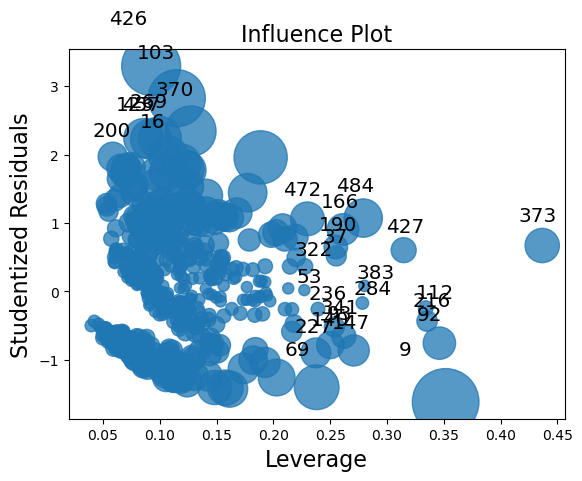

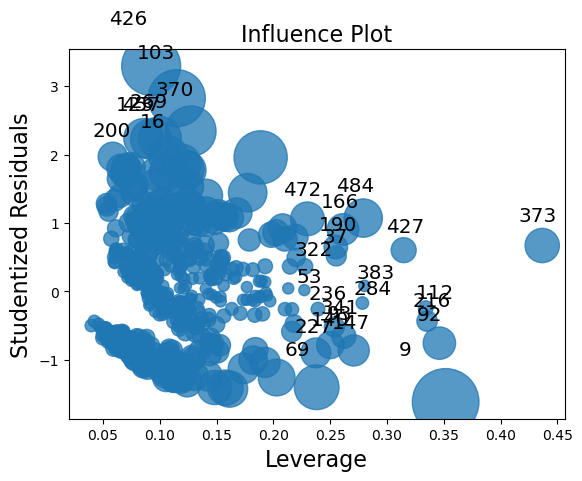

In [1040]:
infl.plot_influence()

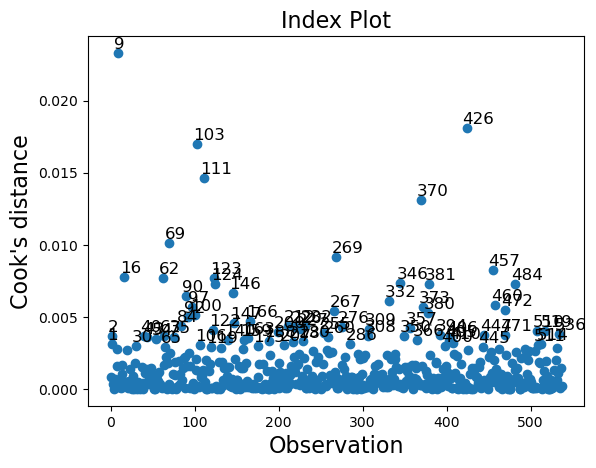

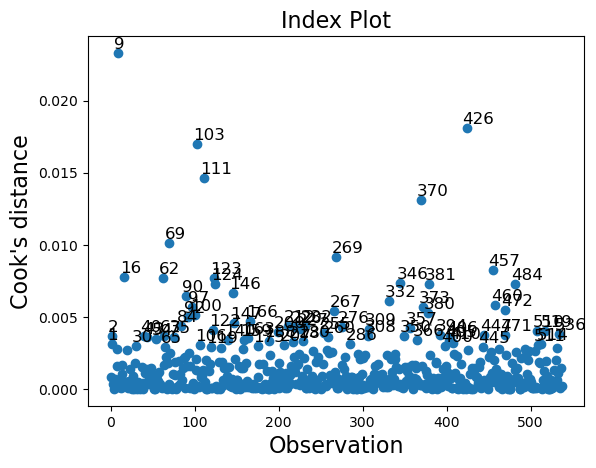

In [1041]:
infl.plot_index(y_var="cooks", threshold=2 * infl.cooks_distance[0].mean())

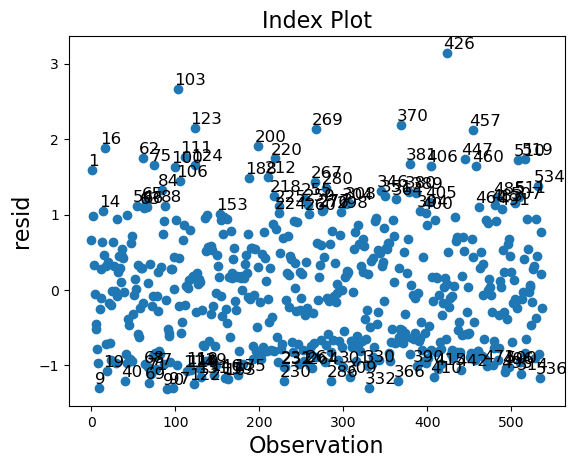

In [1042]:
fig = infl.plot_index(y_var="resid", threshold=1)

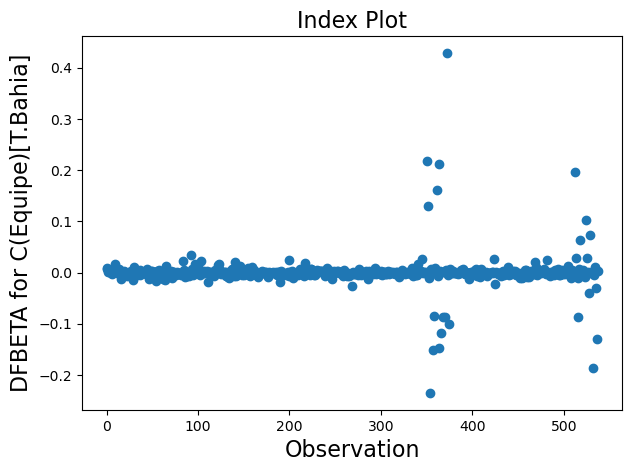

In [1043]:
fig = infl.plot_index(y_var="dfbeta", idx=3, threshold=0.5)
fig.tight_layout(pad=1.0)


# Selecão de Modelo

# Seleção de Variaveis

# Previsao

In [1044]:
tabela.columns

Index(['Unnamed: 0', 'Rk', 'Squad', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD',
       'Pts', 'Pts/MP', 'xG', 'xGA', 'xGD', 'xGD/90', 'Last 5', 'xGConv',
       'xGAConv', 'GF/MP', 'GA/MP', 'expG', 'xG_casa', 'xG_fora', 'xG_total',
       'GF_casa', 'GF_fora', 'GF_total', 'GA_casa', 'GA_fora', 'GA_total',
       'xG_sofrido_casa', 'xG_sofrido_fora', 'xG_5casa', 'xG_5fora',
       'xG_5total', 'GF_5casa', 'GF_5fora', 'GF_5total', 'GA_5casa',
       'GA_5fora', 'GA_5total', 'xG_5sofrido_casa', 'xG_5sofrido_fora',
       'Sh_casa', 'SoT_casa', 'Saves_casa', 'GCA_casa', 'Tklw_casa', 'Sh_fora',
       'SoT_fora', 'Saves_fora', 'GCA_fora', 'Tklw_fora'],
      dtype='object')

'GF ~ C(Equipe)*C(Venue) + xG + xGA + Sh + SoT + Saves + GCA + TklW + C(Opponent)'

In [1045]:
def rho_dependencia(x, y, lambda_x, mu_y, rho):
    if x==0 and y==0:
        return 1- (lambda_x * mu_y * rho)
    elif x==0 and y==1:
        return 1 + (lambda_x * rho)
    elif x==1 and y==0:
        return 1 + (mu_y * rho)
    elif x==1 and y==1:
        return 1 - rho
    else:
        return 1.0

def matrix_probs(df, tabela= tabela):
  lambdas = {}
  matriz_gols = {}
  rho_matriz = {}

  for i in range(0, 10):
    tabela_casa = tabela[tabela['Squad'] == df.iloc[i,3]]
    tabela_fora = tabela[tabela['Squad'] == df.iloc[i,8]]
    lambda_x = modelo.predict(pd.DataFrame(data={'Equipe': df.iloc[i, 3], 
                                                 'Opponent': df.iloc[i, 8],
                                                 'Venue': 1,
                                                 'xG': float(tabela_casa['xG_casa'])},
                                           index=[1])).values[0]
    lambda_y = modelo.predict(pd.DataFrame(data={'Equipe': df.iloc[i, 8], 
                                                 'Opponent': df.iloc[i, 3],
                                                 'Venue': 0,
                                                 'xG': float(tabela_fora['xG_fora'])},
                                           index=[1])).values[0]
    lambdas[df.iloc[i, 3]] = [[stats.poisson.pmf(i, lambdas) for i in range(0, 8)] for lambdas in [lambda_x, lambda_y]]
    matriz_gols[df.iloc[i, 3]] = np.outer(lambdas[df.iloc[i, 3]][0], lambdas[df.iloc[i, 3]][1])
    rho_matriz[df.iloc[i, 3]] = np.array([[rho_dependencia(gol_casa, gol_fora, lambda_x, lambda_y, (-0.13)) for gol_fora in range(2)] for gol_casa in range(2)])
    matriz_gols[df.iloc[i, 3]][:2,:2] = matriz_gols[df.iloc[i, 3]][:2,:2] * rho_matriz[df.iloc[i, 3]]

  return matriz_gols#, lambdas, rho_matriz


def inserir_df(matriz, df):
  times = list(matriz.keys())
  
  for time in times:
    df.loc[df['Home'] == time, 'vitoria_casa'] = np.sum(np.tril(matriz[time], -1))
    df.loc[df['Home'] == time, 'empate'] = np.sum(np.diag(matriz[time]))
    df.loc[df['Home'] == time, 'vitoria_fora'] = np.sum(np.triu(matriz[time], 1))
  
  return df

In [1046]:
matriz_gols = matrix_probs(rodada_futura)
rodada_previsoes = inserir_df(matriz_gols, rodada_futura)

# Adicionar em 'Todas Previsoes'

In [1047]:
todas_previsoes = pd.read_excel('dados/previsoes/todas_previsoes.xlsx', index_col= None)
todas_previsoes.drop(todas_previsoes.columns[0], axis=1, inplace= True)

In [1048]:
def compare_columns(row):
    if row['gols_casa'] > row['gols_fora']:
        return 'gols_casa'
    elif row['gols_casa'] < row['gols_fora']:
        return 'gols_fora'
    else:
        return 'empate'  # Handle cases when values are equal

def compare_columns1(row):
    if row['vitoria_casa'] > row['empate'] and row['vitoria_casa'] > row['vitoria_fora']:
        return 'gols_casa'
    elif row['vitoria_fora'] > row['empate'] and row['vitoria_fora'] > row['vitoria_casa']:
        return 'gols_fora'
    else:
        return 'empate'  # Handle cases when values are equal

def compare_columns2(row):
    if row['acerto1'] == row['acerto2']:
        return 'acerto'
    else:
        return 'fracasso'

In [1049]:
if (todas_previsoes[todas_previsoes['Wk'] == rodada_prox]['vitoria_casa'] == None).all():
  todas_previsoes = pd.concat([todas_previsoes, rodada_futura], ignore_index= True)
if (todas_previsoes[todas_previsoes['Wk'] == rodada_prox]['gols_casa'].isna()).all():
  resultados = todas_rodadas[todas_rodadas['Wk'] >= todas_previsoes['Wk'].min()].reset_index().drop('index', axis= 1)
  todas_previsoes.update(resultados)
if (todas_previsoes[todas_previsoes['Wk'] == rodada_prox]['gols_casa'].notna()).all():  
  todas_previsoes['acerto1'] = todas_previsoes.apply(compare_columns, axis=1)
  todas_previsoes['acerto2'] = todas_previsoes.apply(compare_columns1, axis=1)
  todas_previsoes['acerto'] = todas_previsoes.apply(compare_columns2, axis=1)
  todas_previsoes.drop(['acerto1', 'acerto2'], axis=1, inplace= True)

In [1050]:
todas_previsoes.to_excel('dados/previsoes/todas_previsoes.xlsx')
rodada_futura.to_excel(f'dados/previsoes/previsao_rodada-{rodada_prox}.xlsx')